Методы и функции WordNet.

In [ ]:
! pip install nltk
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

Список синсетов.

In [ ]:
wn.synsets('dish')

Значение слова.

In [ ]:
print(wn.synset('dish.v.01').definition())

Пример использования.

In [ ]:
print(wn.synset('dish.v.01').examples())

Все имена, определения и примеры использования синсетов существительного “dish”.

In [ ]:
for word in wn.synsets('dish',wn.NOUN):
  print("имя: ", word.name(), "\nопределение: ", word.definition(), "\nпример: ", word.examples())

Получить лемы сиснсета.

In [ ]:
synlist=wn.synsets('dish')
print(synlist)
print("лемма: ", synlist[3].lemma_names(), "имя: ", synlist[3].name())

Гипо́ним — понятие, выражающее частную сущность по отношению к другому, более общему понятию.

Гипероним — понятие в отношении к другому понятию, выражающее более общую сущность.

In [ ]:
wo=wn.synset('work.n.01')
print(wo.hyponyms())
print(wo.hypernyms())
print(wo.root_hypernyms())

Можно определить из каких веществ состоит “wood”, и частью каких веществ оно является.

In [ ]:
wood=wn.synset('wood.n.01')
print(wood.substance_meronyms())
print(wood.substance_holonyms())

Антоним понятия.

In [ ]:
print(wn.lemma('horizontal.a.01.horizontal').antonyms())

Действия вовлечены в понятие “eat”.

In [ ]:
wn.synset('eat.v.01').entailments()

Наименьший общий гипероним синсетов 'bowl.n.01' и 'polyhedron.n.01'

In [ ]:
wn.synset('bowl.n.01').lowest_common_hypernyms(wn.synset('polyhedron.n.01'))

Семантическое расстояние между синсетами job.n.07 и work.n.01

In [ ]:
wn.synset('job.n.07').path_similarity(wn.synset('work.n.01'))



> Определение семантической близость двух понятий основываясь на длине пути в графе гиперонимов семантической сети WordNet.



Семантическая близость между двумя понятиями обратно пропорциональна длине пути в графе гиперонимов.

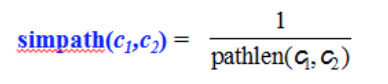

1) Найти длину пути между двумя словами в wordnet.

**pathlen(c1, c2)** = 1 + число ребер в кратчайшем пути в графу гиперонимов между смысловыми узлами с1 и с2.

In [ ]:
shortest_path_distance = wn.synset('hostess.n.01').shortest_path_distance(wn.synset('liberal.n.01'))
print(shortest_path_distance)
pathlen = 1 + shortest_path_distance

3


In [ ]:
simpath = 1/pathlen
print(simpath)

Используя определение семантической близости, базирующееся на длине пути в графе WordNet, определите какие два понятия более близки по смыслу *'hostess'* и *'liberal'* или *'hostess'*и *'host'*.

In [ ]:
def more_similar(word1,word2)



> Определение семантической близость двух понятий согласно методу Резника (Reznik).



**simresnik(c1,c2) = IC(LCS (C1, C2)) = -log P(LCS(c1,c2))**

где **LCS(c1,c2)** — это наименьшее общее вышестоящее двух понятий c1 и c2 в сети  WordNet.

**IC(с) (information content)** или информационное содержание определяется, как вероятность встретить некое понятие с в большом корпусе — P(c).

**P(c)** — вероятность того, что случайно выбранное слово в корпусе, является примером понятия с. Такая вероятность считается как сумма всех слов, которые являются дочерними узлами данного концепта c, нормализованная на количество слов в корпусе.

nltk.download('brown')
from nltk.corpus import brown 
import math

In [ ]:
LCS = wn.synset('man.n.01').lowest_common_hypernyms(wn.synset('woman.n.01'))
print(LCS)

[Synset('adult.n.01')]


In [ ]:
hyper = LCS[0]
hyponym = hyper.hyponyms()
print(hyponym)

[Synset('brachycephalic.n.01'), Synset('caregiver.n.02'), Synset('catch.n.03'), Synset('centrist.n.01'), Synset('character.n.05'), Synset('conservative.n.01'), Synset('dolichocephalic.n.01'), Synset('elder.n.01'), Synset('ex-spouse.n.01'), Synset('host.n.01'), Synset('important_person.n.01'), Synset('jack_of_all_trades.n.01'), Synset('liberal.n.01'), Synset('liberal.n.02'), Synset('man.n.01'), Synset('militarist.n.01'), Synset('oldster.n.01'), Synset('pacifist.n.01'), Synset('patrician.n.01'), Synset('pledgee.n.01'), Synset('pledger.n.01'), Synset('professional.n.01'), Synset('sobersides.n.01'), Synset('sophisticate.n.01'), Synset('stay-at-home.n.01'), Synset('stoic.n.02'), Synset('thoroughbred.n.01'), Synset('woman.n.01')]


In [ ]:
ic=(len(sorted(lemma.name() for w in hyponym for lemma in w.lemmas()))/len(brown.words()))
print(ic)

4.5642753308669025e-05


In [ ]:
resnik = -math.log(ic)
print (int(resnik))